# 物理系を表現する

量子コンピュータの並列性を利用した計算の代表例として、量子系のダイナミクスシミュレーションについて学びます。

```{contents} 目次
---
local: true
---
```

$\newcommand{\bra}[1]{\langle #1 |}$
$\newcommand{\ket}[1]{| #1 \rangle}$
$\newcommand{\upket}{\ket{\!\uparrow}}$
$\newcommand{\downket}{\ket{\!\downarrow}}$
$\newcommand{\rightket}{\ket{\!\rightarrow}}$
$\newcommand{\leftket}{\ket{\!\leftarrow}}$

## 量子系のダイナミクスとは

量子力学について少しでも聞いたことのある方は、量子力学の根幹にシュレーディンガー方程式というものが存在することを知っているかと思います。この方程式は

$$
i \hbar \frac{\partial}{\partial t} \ket{\psi (t)} = H \ket{\psi (t)}
$$

などと表現され、時刻$t$のある系の状態$\ket{\psi (t)}$の時間微分（左辺）が$\ket{\psi (t)}$へのハミルトニアンという演算子の作用で定まる（右辺）ということを表しています。ただしこの「微分形」の方程式は我々の目的には少し使いづらいので、ここでは等価な「積分形」にして

$$
\ket{\psi (t_1)} = T \left[ \exp \left( -\frac{i}{\hbar} \int_{t_0}^{t_1} H dt \right) \right] \ket{\psi (t_0)}
$$

と書いておきます。$T[\cdot]$は「時間順序演算子」と呼ばれ重要な役割を持ちますが、説明を割愛し、以下ではハミルトニアン$H$が直接時間に依存しない場合の

$$
\ket{\psi (t_1)} = \exp \left( -\frac{i}{\hbar} H (t_1 - t_0) \right) \ket{\psi (t_0)}
$$

のみを考えます。量子状態に対する演算子（線形演算子）の指数関数もまた演算子なので、積分形のシュレーディンガー方程式は「$e^{-i/\hbar H (t_1-t_0)}$という演算子が系を時刻$t_0$の初期状態$\ket{\psi(t_0)}$から時刻$t_1$の状態$\ket{\psi(t_1)}$に発展させる」と読めます。さらに、定義上ハミルトニアンは「エルミート演算子」であり、それに虚数単位をかけて指数の冪にした$e^{-i/\hbar H t}$（以下これを時間発展演算子$U_H(t)$と呼びます）は「ユニタリ演算子」です（このあたりの線形代数の用語にあまり馴染みがなくても、そういうものかと思ってもらえれば結構です）。

ユニタリ演算子は量子計算の言葉で言えばゲートにあたります。したがって、ある量子系に関して、その初期状態を量子レジスタで表現でき、時間発展演算子を量子コンピュータの基本ゲートの組み合わせで実装できれば、その系のダイナミクス（＝時間発展）シミュレーションを量子コンピュータで行うことができます。

### 例：核磁気の歳差運動

シミュレーションの詳しい話をする前に、これまで量子力学と疎遠だった方のために、ハミルトニアンや時間発展とは具体的にどういうことか、簡単な例を使って説明します。

空間中に固定されたスピン$\frac{1}{2}$原子核一つを考えます。ある方向（Z方向とします）のスピン$\pm \frac{1}{2}$の状態をそれぞれ$\upket, \downket$で表します。量子力学に馴染みのない方のための説明例で大いに量子力学的な概念を使っていますが、何の話かわからなければ「2つの基底ケットで表現される、量子ビットのような物理系がある」と考えてください。量子ビットのような物理系なので、系の状態は一般に$\upket$と$\downket$の重ね合わせになります。

時刻$t_0$で系が$\ket{\psi(t_0)} = \upket$にあるとします。時刻$t_1$での系の状態を求めることは

$$
\ket{\psi (t_1)} = \alpha (t_1) \upket + \beta (t_1) \downket
$$

の$\alpha (t_1)$と$\beta (t_1)$を求めることに相当します。ここで$\alpha (t_0) = 1, \beta (t_0) = 0$です。

この原子核に$X$方向の一定磁場をかけます。非ゼロのスピンを持つ粒子はスピンベクトル$\vec{\sigma}$と平行な磁気モーメント$\vec{\mu}$を持ち、磁場$\vec{B}$のもとでエネルギー$-\vec{B}\cdot\vec{\mu}$を得ます。ハミルトニアンとは実は系のエネルギーを表す演算子なので、この一定磁場だけに注目した場合の系のハミルトニアンは、何かしらの定数$\omega$とスピンベクトルの$X$成分$\sigma^X$を用いて$H = \hbar \omega \sigma^X$と書けます。

量子力学では$\sigma^X$は演算子であり、$\upket$と$\downket$に対して

$$
\sigma^X \upket = \downket \\
\sigma^X \downket = \upket
$$

と作用します。時間発展演算子$U_H(t)$は

$$
U_H(t) = \exp (-i \omega t \sigma^X) = \sum_{n=0}^{\infty} \frac{1}{n!} (-i \omega t)^n (\sigma^X)^n = I + (-i \omega t) \sigma^X + \frac{1}{2} (-i \omega t)^2 (\sigma^X)^2 + \frac{1}{6} (-i \omega t)^3 (\sigma^X)^3 \cdots
$$

ですが（$I$は恒等演算子）、上の$\sigma^X$の定義からわかるように$(\sigma^X)^2 = I$なので

```{math}
:label: exp_sigmax
\begin{align}
\exp (-i \omega t \sigma^X) & = \left[ 1 + \frac{1}{2} (-i \omega t)^2 + \cdots \right] I + \left[(-i \omega t) + \frac{1}{6} (-i \omega t)^3 + \cdots \right] \sigma^X \\
& = \cos(\omega t) I - i \sin(\omega t) \sigma^X
\end{align}
```

と書けます。したがって、

```{math}
:label: spin_exact
\begin{align}
\ket{\psi (t_1)} = U_H(t_1 - t_0) \ket{\psi (t_0)} & = \exp [-i \omega (t_1 - t_0) \sigma^X] \upket \\
& = \cos[\omega (t_1 - t_0)] \upket - i \sin[\omega (t_1 - t_0)] \downket
\end{align}
```

です。任意の時刻$t_1$のスピンの状態が基底$\upket$と$\downket$の重ね合わせとして表現されました。

このように、系のエネルギーの表式からハミルトニアンが決まり、その指数関数を初期状態に作用させることで時間発展後の系の状態が求まります。

ちなみに、$\ket{\psi (t_1)}$は$t_1 = t_0$で$\upket$、$t_1 = t_0 + \pi / (2 \omega)$で$(-i)\downket$となり、以降$\upket$と$\downket$を周期的に繰り返します。実は、その間の状態はスピンが$Y$-$Z$平面内を向いている状態に相当します。スピンが0でない原子核に磁場をかけると、スピンと磁場の方向が揃っていなければ磁場の方向を軸にスピンが歳差運動（すりこぎ運動）をします。これはコマが重力中で起こす運動と同じで、核磁気共鳴（NMR、さらに医学応用のMRI）の原理に深く関わります。

### 量子コンピュータ上での表現

すでに触れましたが、上の例で核のスピンは量子ビットのように2つの基底ケットを持ちます（2次元量子系です）。さらに、お気づきの方も多いと思いますが、$\sigma^X$の$\upket$と$\downket$への作用は$X$ゲートの$\ket{0}$と$\ket{1}$への作用そのものです。このことから、核磁気の歳差運動が極めて自然に量子コンピュータでシミュレートできることがわかるかと思います。

実際には、時間発展演算子は$\sigma^X$そのものではなくその指数関数なので、量子コンピュータでも$\exp (-i \frac{\theta}{2} X)$に対応する$R_{x} (\theta)$ゲートを利用します。これまで紹介されませんでしたが、$R_{x}$ゲートはパラメータ$\theta$をとり、

$$
R_{x}(\theta)\ket{0} = \cos\frac{\theta}{2}\ket{0} - i\sin\frac{\theta}{2}\ket{1} \\
R_{x}(\theta)\ket{1} = -i\sin\frac{\theta}{2}\ket{0} + \cos\frac{\theta}{2}\ket{1}
$$

という変換を行います。上の核スピン系を量子コンピュータでシミュレートするには、1量子ビットで$R_{x} (2 \omega (t_1 - t_0)) \ket{0}$を計算する以下の回路を書けばいいだけです。

In [1]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit import Parameter

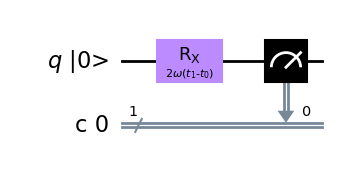

In [2]:
circuit = QuantumCircuit(QuantumRegister(1, 'q'), ClassicalRegister(1, 'c'))
circuit.rx(Parameter(r'$2 \omega (t_1 - t_0)$'), 0)
circuit.measure(0, 0)
circuit.draw('mpl', initial_state=True)

### ハミルトニアンの対角化

再び量子コンピュータを離れて、量子・古典に関わらずデジタル計算機で量子ダイナミクスのシミュレーションをする際の一般論をします。

上の核スピンの例ではハミルトニアンが単純だったので、式{eq}`spin_exact`のように厳密解が求まりました。特に、導出において$(\sigma^X)^2 = I$という恒等式が非常に重要でした。しかし、一般のハミルトニアンでは、何乗しても恒等演算子の定数倍にたどり着く保証がありません。

累乗して恒等演算子にならないようなハミルトニアンであっても、系の次元が小さい場合は「対角化」という作業で厳密解を得られます。ハミルトニアンの対角化とは、ハミルトニアンの作用が実数をかけることと等しくなるようなケットを探してくること、つまり

$$
H\ket{\phi_j} = \hbar \omega_j \ket{\phi_j}, \quad \omega_j \in \mathbb{R}
$$

が成り立つような$\ket{\phi_j}$を見つけることを指します。このような$\ket{\phi_j}$を「固有値$\hbar \omega_j$を持つ$H$の固有ベクトル」と呼びます。「エネルギー固有状態」と呼ぶこともあります。系の次元が$N$であれば、独立な固有ベクトルが$N$個存在します。

例えば上の例では$H = \hbar \omega \sigma^X$ですが、

```{math}
:label: left_right_kets
\rightket := \frac{1}{\sqrt{2}}(\upket + \downket) \\
\leftket := \frac{1}{\sqrt{2}}(\upket - \downket)
```

という2つの状態を考えると

$$
\sigma^X \rightket = \rightket \\
\sigma^X \leftket = -\leftket
$$

なので、これらが固有値$\pm \hbar \omega$の$H$の固有ベクトルとなっていることがわかります。

固有値$\hbar \omega_j$のハミルトニアン$H$の固有ベクトル$\ket{\phi_j}$は自動的に時間発展演算子$U_H(t)$の固有値$e^{-i\omega_j t}$の固有ベクトルでもあります。

$$
U_H(t) \ket{\phi_j} = \exp \left( -\frac{i}{\hbar} H t \right) \ket{\phi_j} = \exp (-i \omega_j t) \ket{\phi_j}.
$$

したがって、系の初期状態$\ket{\psi (t_0)}$が

$$
\ket{\psi (t_0)} = \sum_{j=0}^{N} c_j \ket{\phi_j}
$$

であれば、時刻$t_1$での状態は

$$
\ket{\psi (t_1)} = \sum_{j=0}^{N} c_j U_H(t_1 - t_0) \ket{\phi_j} = \sum_{j=0}^{N} e^{-i \omega_j (t_1 - t_0)} c_j \ket{\phi_j},
$$

つまり、各固有ベクトルの振幅に、対応する位相因子をかけるだけで求まります。

再び核スピンの例を見ると、初期状態$\ket{\psi(t_0)} = \upket = 1/\sqrt{2} (\rightket + \leftket)$なので、

$$
\begin{align}
\ket{\psi(t_1)} & = \frac{1}{\sqrt{2}} \left( e^{-i\omega (t_1 - t_0)} \rightket + e^{i\omega (t_1 - t_0)} \leftket \right) \\
& = \frac{1}{2} \left[ \left( e^{-i\omega (t_1 - t_0)} + e^{i\omega (t_1 - t_0)} \right) \upket + \left( e^{-i\omega (t_1 - t_0)} - e^{i\omega (t_1 - t_0)} \right) \downket \right] \\
& = \cos [\omega (t_1-t_0)] \upket - i \sin [\omega (t_1-t_0)] \downket
\end{align}
$$

となり、式{eq}`spin_exact`が再導出できます。

このように、ハミルトニアンの対角化さえできれば、量子ダイナミクスのシミュレーションは位相をかけて足し算をするだけの問題に帰着します。しかし、上で言及したように、計算量の問題から、ハミルトニアンが対角化できるのは主に系の次元が小さいときに限ります。「対角化」という言葉が示唆するように、この操作は行列演算（対角化）を伴い、その際の行列の大きさは$N \times N$です。上の核スピンの例では$N=2$でしたが、もっと実用的なシミュレーションの場合、系の量子力学的次元は一般的に関係する自由度の数（粒子数など）の指数関数的に増加します。比較的小規模な系でもすぐに対角化にスーパーコンピュータが必要なスケールになってしまいます。

### 鈴木・トロッター分解

ハミルトニアンが対角化できない場合、ダイナミクスシミュレーションをするには、結局式{eq}`spin_exact`のように初期状態に時間発展演算子を愚直にかけていくことになります。これは、式{eq}`exp_sigmax`のように$U_H(t)$を閉じた形式で厳密に書けるなら簡単な問題ですが、そうでない場合は数値的に近似していく必要があります。その場合の常套手段は、行いたい時間発展$(t_1 - t_0)$を短い時間

$$
\Delta t = \frac{t_1 - t_0}{M}, \quad M \gg 1
$$

に分割し、$\Delta t$だけの時間発展$U_H(\Delta t)$を考えることです。もちろん、$U_H(t)$が閉じた形式で書けないのなら当然$U_H(\Delta t)$も書けないので、時間を分割しただけでは状況は変わりません。しかし、$\Delta t$が十分短いとき、$U_H(\Delta t)$に対応する計算可能な近似演算子$\tilde{U}_{H;\Delta t}$を見つけることができる場合があり、この$\tilde{U}_{H;\Delta t}$での状態の遷移の様子がわかるのであれば、それを$M$回繰り返すことで、求める終状態が近似できることになります。

例えば、通常$H$はわかっており、任意の状態$\ket{\psi}$に対して$H\ket{\psi}$が計算できるので、$\mathcal{O}((\Delta t)^2)$を無視する近似で

$$
\tilde{U}_{H;\Delta t} = I - \frac{i \Delta t}{\hbar} H
$$

とすれば、まず$H\ket{\psi(t_0)}$を計算し、それを$i\Delta t/\hbar$倍して$\ket{\psi(t_0)}$から引き、その結果にまた$H$をかけて、…という具合に$\ket{\psi(t_1)}$が近似計算できます[^exact_at_limit]。

しかし、このスキームは量子コンピュータでの実装に向いていません。上で述べたように量子コンピュータのゲートはユニタリ演算子に対応するのに対して、$I - i\Delta t / \hbar H$はユニタリでないからです。代わりに、量子コンピュータでのダイナミクスシミュレーションでよく用いられるのが鈴木・トロッター分解という近似法です{cite}`nielsen_chuang_dynamics`。

鈴木・トロッター分解が使えるケースとは、

- $U_H(t)$は量子回路として実装が難しい。
- ハミルトニアンが$H = \sum_{k=1}^{L} H_k$のように複数の部分ハミルトニアン$\{H_k\}_k$の和に分解できる。
- 個々の$H_k$に対しては$U_{H_k}(t) = \exp(-\frac{i t}{\hbar} H_k)$が簡単に実装できる。

のような場合です。もしも$H$や$H_k$が演算子ではなく単なる実数であれば、$\exp\left(\sum_k A_k\right) = \prod_k e^{A_k}$なので、$U_H(t) = \prod_k U_{H_k}(t)$となります。ところが、一般に線形演算子$A, B$に対して、特殊な条件が満たされる（$A$と$B$が「可換」である）場合を除いて

$$
\exp(A + B) \neq \exp(A)\exp(B)
$$

なので、そのような簡単な関係は成り立ちません。しかし、

$$
\exp \left(- \frac{i \Delta t}{\hbar} H \right) = \prod_{k=1}^{L} \exp \left(-\frac{i \Delta t}{\hbar} H_k \right) + \mathcal{O}((\Delta t)^2)
$$

という、Baker-Campbell-Hausdorfの公式の応用式は成り立ちます。これによると、時間分割の極限では、

$$
\lim_{\substack{M \rightarrow \infty \\ \Delta t \rightarrow 0}} \left[ \prod_{k=1}^{L} \exp \left(-\frac{i \Delta t}{\hbar} H_k \right) \right]^M = \exp \left(-\frac{i}{\hbar} H (t_1 - t_0) \right).
$$

つまり、$U_H(\Delta t)$を

$$
\tilde{U}_{H;\Delta t} = \prod_k U_{H_k}(\Delta t)
$$

で近似すると、$[\tilde{U}_{H;\Delta t}]^M$と$U_H(t_1 - t_0)$の間の誤差は$\Delta t$を短くすることで[^sufficiently_small]いくらでも小さくできます。

鈴木・トロッター分解とは、このように全体の時間発展$U_H(t_1 - t_0)$を短い時間発展$U_H(\Delta t)$の繰り返しにし、さらに$U_H(\Delta t)$をゲート実装できる部分ユニタリの積$\prod_k U_{H_k}(\Delta t)$で近似する手法のことを言います。

[^exact_at_limit]: 実際、この手続きは$M \rightarrow \infty$の極限で厳密に$U(t_1 - t_0)$による時間発展となります。
[^sufficiently_small]: 具体的には、$\Omega = H/\hbar, \Omega_k = H_k/\hbar$として$\exp(-i\Delta t \Omega) - \prod_{k} \exp(-i\Delta t \Omega_k) = (\Delta t)^2/2 \sum_{k \neq l} [\Omega_k, \Omega_l] + \mathcal{O}((\Delta t)^3)$なので、任意の状態$\ket{\psi}$について$(\Delta t)^2 \sum_{k \neq l} \bra{\psi} [\Omega_k, \Omega_l] \ket{\psi} \ll 1$が成り立つとき、$\Delta t$が十分小さいということになります。

### なぜ量子コンピュータが量子ダイナミクスシミュレーションに向いているか

鈴木・トロッター分解がダイナミクスシミュレーションに適用できるには、ハミルトニアンが都合よくゲートで実装できる$H_k$に分解できる必要があります。これが常に成り立つかというと、答えはyes and noです。

まず、$2^n$次元線形空間に作用するエルミート演算子は、$n$個の2次元部分系に独立に作用する基底演算子$\{I, \sigma^X, \sigma^Y, \sigma^Z\}$の積の線形和に分解できます。$\sigma^X$以外のパウリ演算子$\sigma^Y$と$\sigma^Z$はここまで登場しませんでしたが、重要なのは、2次元量子系に作用する$\sigma^X, \sigma^Y, \sigma^Z$がそれぞれ量子ビットに作用する$X, Y, Z$ゲート[^ygate]に、パウリ演算子の指数関数がそれぞれ$R_x, R_y, R_z$ゲート（総じて回転ゲートと呼びます）に対応するということです。つまり、対象の物理系の量子レジスタへの対応付けさえできれば、そのハミルトニアンは必ず基本的なゲートの組み合わせで表現できます。

しかし、$n$ビットレジスタに作用する基底演算子の組み合わせは$4^n$通りあり、最も一般のハミルトニアンではその全ての組み合わせが寄与することも有りえます。その場合、指数関数的に多くのゲートを用いてしか時間発展演算子が実装できないことになります。それでは「都合よく分解できる」とは言えません。

そもそも量子コンピュータで量子ダイナミクスシミュレーションを行う利点は、その計算効率にあります。

シミュレートする量子系の次元を$2^n$としたとき、古典計算機では、仮にハミルトニアンが対角化できても$2^n$回の位相因子の掛け算と同じ回数だけの足し算を行う必要があります。ハミルトニアンが対角化できず、時間を$M$ステップに区切って近似解を求めるとなると、必要な計算回数は$\mathcal{O}(2^nM)$となります。

一方、同じ計算に$n$ビットの量子コンピュータを使うと、対角化できない場合のステップ数$M$は共通ですが、各ステップで必要な計算回数（＝ゲート数）はハミルトニアン$H$の基底演算子への分解$H_k$の項数$L$で決まります。個々の$H_k$は一般に$\mathcal{O}(n)$ゲート要するので、計算回数は$\mathcal{O}(nLM)$です。したがって、$L$が$\mathcal{O}(1)$であったり$\mathcal{O}(\mathrm{poly}(n))$（$n$の多項式）であったりすれば、量子コンピュータでの計算が古典のケースよりも指数関数的に早いということになります。

したがって、逆に、ハミルトニアンが$4^n$通りの基底演算子に分解されてしまっては（$L=4^n$）、量子コンピュータの利点が活かせません[^exponential_memory]。

幸いなことに、通常我々がシミュレートしたいと思うような物理系では、$L$はせいぜい$\mathcal{O}(n^2)$で、$\mathcal{O}(n)$ということもしばしばあります。2体相互作用のある量子多体系などが前者にあたり、さらに相互作用が隣接した物体間のみである場合、後者が当てはまります。

[^ygate]: $Y$ゲートは変換$Y\ket{0} = i\ket{1}$、$Y\ket{1} = -i\ket{0}$を引き起こします。
[^exponential_memory]: 古典計算機でのシミュレーションでは、一般的には全ての固有ベクトルの振幅を記録しておくためのメモリ（$\mathcal{O}(2^n)$）も必要です。一方量子コンピュータでは（測定時に限られた情報しか取り出せないという問題はありますが）そのような制約がないので、指数関数的に多くのゲートを用いるハミルトニアンでも、一応後者に利点があると言えるかもしれません。

## 実習：ハイゼンベルグモデルの時間発展

### モデルのハミルトニアン

ハミルトニアンの分解と言われてもピンと来ない方もいるかもしれませんし、ここからはダイナミクスシミュレーションの具体例をQiskitで実装してみましょう。

ハイゼンベルグモデルという、磁性体のトイモデルを考えます。空間中一列に固定された多数のスピンを持つ粒子（電子）の系で、隣接スピンの向きによってエネルギーが決まるような問題です。

例えば、$n$スピン系で簡単な形式のハミルトニアンは

```{math}
:label: heisenberg
H = -J \sum_{j=0}^{n-2} (\sigma^X_{j+1}\sigma^X_{j} + \sigma^Y_{j+1}\sigma^Y_{j} + \sigma^Z_{j+1} \sigma^Z_{j})
```

です。ここで、$\sigma^{[X,Y,Z]}_j$は第$j$スピンに作用するパウリ演算子です。

ただし、式{eq}`heisenberg`の和の記法には実は若干の省略があります。例えば第$j$項をより正確に書くと、

$$
I_{n-1} \otimes \dots \otimes I_{j+2} \otimes \sigma^X_{j+1} \otimes \sigma^X_{j} \otimes I_{j-1} \otimes \dots I_{0}
$$

です。ここで$\otimes$は線形演算子間の「テンソル積」を表しますが、聞き慣れない方は掛け算だと思っておいてください。重要なのは、式{eq}`heisenberg`の各項が、上で触れたように$n$個の基底演算子の積になっているということです。さらに、この系では隣接スピン間の相互作用しか存在しないため、ハミルトニアンが$n-1$個の項に分解できています。

この系では、隣接スピン間の向きが揃っている（内積が正）のときにエネルギーが低くなります[^quantum_inner_product]。少し考えるとわかりますが、すべてのスピンが完全に同じ方向を向いている状態が最もエネルギーの低いエネルギー固有状態です。そこで、最低エネルギー状態から少しだけずらして、スピンが一つだけ直角方向を向いている状態を始状態としたときのダイナミクスをシミュレートしてみましょう。

核スピンのケースと同様に、それぞれのスピンについて+$Z$方向を向いた状態$\upket$を量子ビットの状態$\ket{0}$に、-$Z$方向の状態$\downket$を$\ket{1}$に対応づけます。このとき、上で見たように、パウリ演算子$\sigma^X, \sigma^Y, \sigma^Z$と$X, Y, Z$ゲートとが対応します。また、$J=\hbar\omega/2$とおきます。

時間発展演算子は

$$
U_H(t) = \exp \left[ \frac{i\omega t}{2} \sum_{j=0}^{n-2} (\sigma^X_{j+1}\sigma^X_{j} + \sigma^Y_{j+1}\sigma^Y_{j} + \sigma^Z_{j+1} \sigma^Z_{j}) \right]
$$

ですが、ハミルトニアンの各項が互いに可換でないので、シミュレーションでは鈴木・トロッター分解を用いて近似します。各時間ステップ$\Delta t$での近似時間発展は

$$
\tilde{U}_{H;\Delta t} = \prod_{j=0}^{n-2} \exp\left( \frac{i \omega \Delta t}{2} \sigma^X_{j+1}\sigma^X_{j} \right) \exp\left( \frac{i \omega \Delta t}{2} \sigma^Y_{j+1}\sigma^Y_{j} \right) \exp\left( \frac{i \omega \Delta t}{2} \sigma^Z_{j+1}\sigma^Z_{j} \right)
$$

です。

### 量子ゲートでの表現

これを回転ゲートと制御ゲートで表します。まず$\exp(\frac{i \omega \Delta t}{2} \sigma^Z_{j+1}\sigma^Z_{j})$について考えてみましょう。この演算子の$j$-$(j+1)$スピン系の4つの基底状態への作用は

$$
\begin{align}
\upket_{j+1} \upket_{j} \rightarrow e^{i \omega \Delta t / 2} \upket_{j+1} \upket_{j} \\
\upket_{j+1} \downket_{j} \rightarrow e^{-i \omega \Delta t / 2} \upket_{j+1} \downket_{j} \\
\downket_{j+1} \upket_{j} \rightarrow e^{-i \omega \Delta t / 2} \downket_{j+1} \upket_{j} \\
\downket_{j+1} \downket_{j} \rightarrow e^{i \omega \Delta t / 2} \downket_{j+1} \downket_{j}
\end{align}
$$

です。つまり、2つのスピンの「パリティ」（同一かどうか）に応じて、かかる位相の符号が違います。

パリティに関する演算をするにはCNOTを使います。例えば以下の回路

[^quantum_inner_product]: これは量子力学的な系なので、もっと正確な表現は「隣接スピン間の内積が正であるようなハミルトニアンの固有状態の固有値が、そうでない固有状態の固有値より小さい」です。

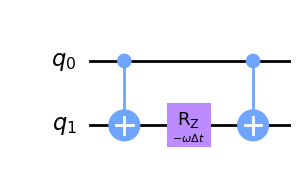

In [3]:
circuit = QuantumCircuit(QuantumRegister(2, 'q'))
circuit.cx(0, 1)
circuit.rz(Parameter(r'-$\omega \Delta t$'), 1)
circuit.cx(0, 1)
circuit.draw('mpl')

によって、計算基底$\ket{00}, \ket{01}, \ket{10}, \ket{11}$はそれぞれ

$$
\begin{align}
\ket{00} \rightarrow e^{i \omega \Delta t / 2} \ket{00} \\
\ket{01} \rightarrow e^{-i \omega \Delta t / 2} \ket{01} \\
\ket{10} \rightarrow e^{-i \omega \Delta t / 2} \ket{10} \\
\ket{11} \rightarrow e^{i \omega \Delta t / 2} \ket{11}
\end{align}
$$

と変換するので（確認してください）、まさに$\exp(\frac{i \omega \Delta t}{2} \sigma^Z_{j+1}\sigma^Z_{j})$の表現になっています。

残りの2つの演算子も同様にパリティに対する回転で表せますが、CNOTで表現できるのは$Z$方向のパリティだけなので、先にスピンを回転させる必要があります。$\exp(\frac{i \omega \Delta t}{2} \sigma^X_{j+1}\sigma^X_{j})$による変換は

$$
\begin{align}
\rightket_{j+1} \rightket_{j} \rightarrow e^{i \omega \Delta t / 2} \rightket_{j+1} \rightket_{j} \\
\rightket_{j+1} \leftket_{j} \rightarrow e^{-i \omega \Delta t / 2} \rightket_{j+1} \leftket_{j} \\
\leftket_{j+1} \rightket_{j} \rightarrow e^{-i \omega \Delta t / 2} \leftket_{j+1} \rightket_{j} \\
\leftket_{j+1} \leftket_{j} \rightarrow e^{i \omega \Delta t / 2} \leftket_{j+1} \leftket_{j}
\end{align}
$$

で、式{eq}`left_right_kets`から、次の回路が対応する変換を引き起こすことがわかります（これも確認してください）。

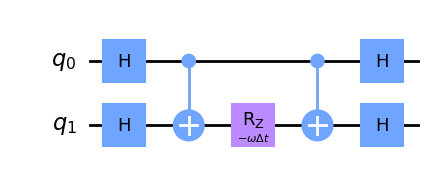

In [4]:
circuit = QuantumCircuit(QuantumRegister(2, 'q'))
circuit.h(0)
circuit.h(1)
circuit.cx(0, 1)
circuit.rz(Parameter(r'-$\omega \Delta t$'), 1)
circuit.cx(0, 1)
circuit.h(0)
circuit.h(1)
circuit.draw('mpl')

最後に、$\exp(\frac{i \omega \Delta t}{2} \sigma^Y_{j+1}\sigma^Y_{j})$に対応する回路は

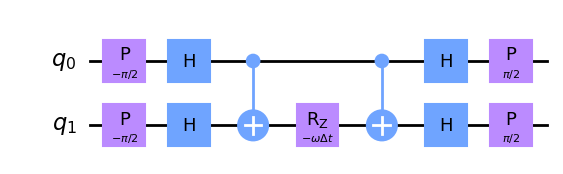

In [5]:
circuit = QuantumCircuit(QuantumRegister(2, 'q'))
circuit.p(-np.pi / 2., 0)
circuit.p(-np.pi / 2., 1)
circuit.h(0)
circuit.h(1)
circuit.cx(0, 1)
circuit.rz(Parameter(r'-$\omega \Delta t$'), 1)
circuit.cx(0, 1)
circuit.h(0)
circuit.h(1)
circuit.p(np.pi / 2., 0)
circuit.p(np.pi / 2., 1)
circuit.draw('mpl')

です[^sgate]。

### 回路実装

やっと準備が整ったので、シミュレーションを実装しましょう。実機で走らせられるように、$n=5$, $M=10$, $\omega \Delta t = 0.1$とします。上で決めたように、ビット0以外が$\upket$、ビット0が$\rightket$という初期状態から始めます。各$\Delta t$ステップごとに回路のコピーをとり、それぞれのコピーで測定を行うことで、時間発展の様子を観察します。

[^sgate]: $P(\pi/2)$ゲートは$S$ゲートとも呼ばれます。$P(-\pi/2)$は$S^{\dagger}$です。

In [6]:
# まずは全てインポート
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.tools.monitor import job_monitor
from qiskit_aer import AerSimulator
from qiskit_ibm_provider import IBMProvider, least_busy
from qiskit_ibm_provider.accounts import AccountNotFoundError
# このワークブック独自のモジュール
from qc_workbook.dynamics import plot_heisenberg_spins
from qc_workbook.utils import operational_backend

In [7]:
n_spins = 5
M = 10
omegadt = 0.1

circuits = []

circuit = QuantumCircuit(n_spins)

# 第0ビットを 1/√2 (|0> + |1>) にする
circuit.h(0)

# Δtでの時間発展をM回繰り返すループ
for istep in range(M):
    # ハミルトニアンのn-1個の項への分解に関するループ
    for jspin in range(n_spins - 1):
        # ZZ
        circuit.cx(jspin, jspin + 1)
        circuit.rz(-omegadt, jspin + 1)
        circuit.cx(jspin, jspin + 1)

        # XX
        circuit.h(jspin)
        circuit.h(jspin + 1)
        circuit.cx(jspin, jspin + 1)
        circuit.rz(-omegadt, jspin + 1)
        circuit.cx(jspin, jspin + 1)
        circuit.h(jspin)
        circuit.h(jspin + 1)

        # YY
        circuit.p(-np.pi / 2., jspin)
        circuit.p(-np.pi / 2., jspin + 1)
        circuit.h(jspin)
        circuit.h(jspin + 1)
        circuit.cx(jspin, jspin + 1)
        circuit.rz(-omegadt, jspin + 1)
        circuit.cx(jspin, jspin + 1)
        circuit.h(jspin)
        circuit.h(jspin + 1)
        circuit.p(np.pi / 2., jspin)
        circuit.p(np.pi / 2., jspin + 1)

    # この時点での回路のコピーをリストに保存
    # measure_all(inplace=False) はここまでの回路のコピーに測定を足したものを返す
    circuits.append(circuit.measure_all(inplace=False))

print(f'{len(circuits)} circuits created')

10 circuits created


量子回路シミュレーターで実行し、各ビットにおける$Z$方向スピンの期待値をプロットしましょう。プロット用の関数は比較的長くなってしまいますが実習の本質とそこまで関係しないので、[別ファイル](https://github.com/UTokyo-ICEPP/qc-workbook/blob/master/source/utils/dynamics.py)に定義してあります。関数はジョブの実行結果、系のスピンの数、初期状態、ステップ間隔を引数にとります。

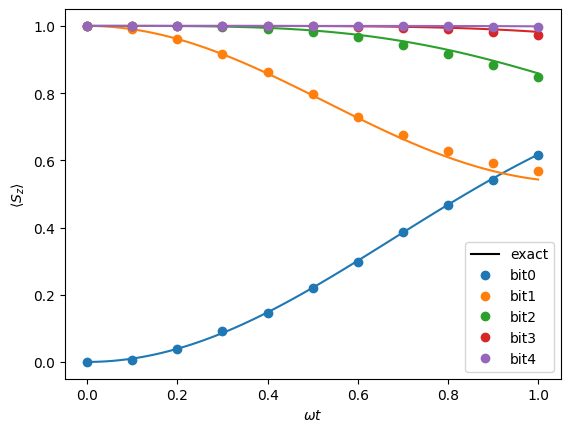

In [8]:
# 初期状態 |0> x |0> x |0> x |0> x 1/√2(|0>+|1>) は配列では [1/√2 1/√2 0 0 ...]
initial_state = np.zeros(2 ** n_spins, dtype=np.complex128)
initial_state[0:2] = np.sqrt(0.5)

shots = 100000

simulator = AerSimulator()

circuits_sim = transpile(circuits, backend=simulator)
sim_job = simulator.run(circuits_sim, shots=shots)
sim_counts_list = sim_job.result().get_counts()

plot_heisenberg_spins(sim_counts_list, n_spins, initial_state, omegadt, add_theory_curve=True)

ビット0でのスピンの不整合が徐々に他のビットに伝搬していく様子が観察できました。

また、上のように関数`plot_heisenberg_spins`に`add_theory_curve=True`という引数を渡すと、ハミルトニアンを対角化して計算した厳密解のカーブも同時にプロットします。トロッター分解による解が、厳密解から少しずつずれていっている様子も観察できます。興味があれば$\Delta t$を小さく（$M$を大きく）して、ずれがどう変わるか確認してみてください。

実機でも同様の結果が得られるか確認してみましょう。

In [9]:
# よりアクセス権の広いプロバイダを使える場合は、下を書き換える
instance = 'ibm-q/open/main'

try:
    provider = IBMProvider(instance=instance)
except IBMQAccountCredentialsNotFound:
    provider = IBMProvider(token='__paste_your_token_here__', instance=instance)

backend_list = provider.backends(filters=operational_backend(min_qubits=n_spins, min_qv=32))
backend = least_busy(backend_list)

print(f'Job will run on {backend.name()}')

NameError: name 'IBMQAccountCredentialsNotFound' is not defined

In [10]:
circuits_ibmq = transpile(circuits, backend=backend)

job = backend.run(circuits_ibmq, shots=8192)

job_monitor(job, interval=2)

counts_list = job.result().get_counts()

NameError: name 'backend' is not defined

In [11]:
plot_heisenberg_spins(counts_list, n_spins, initial_state, omegadt)

NameError: name 'counts_list' is not defined